In [1]:
#Setting the dataset
from sklearn.datasets import load_breast_cancer
import pandas as pd
pd.set_option('display.max_columns', None)
data = load_breast_cancer()
features = pd.DataFrame(data.data, columns=[data.feature_names])
label = pd.Series(data.target, name='Target')

In [2]:
features.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
label.value_counts()

Target
1    357
0    212
Name: count, dtype: int64

In [4]:
print(features.shape, label.shape)

(569, 30) (569,)


In [5]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#Splitting
features_train, features_test, label_train, label_test = train_test_split(features, label, test_size=0.3, random_state= 9)

#Setting the model
model = LogisticRegression(penalty='l1', solver='liblinear', C=90, max_iter=400)
model.fit(features_train, label_train)

result = model.score(features_test, label_test)

#Printing best results
print(f'Accuracy {result:^50}')


Accuracy                 0.9766081871345029                


In [6]:
prediction = model.predict(features_test)
print(prediction)

[0 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 0
 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1
 0 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 1 1 1 0 0
 1 1 0 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1]


In [7]:
from sklearn.metrics import confusion_matrix

#Elaborating the matrix
matrix = confusion_matrix(label_test, prediction)
print(matrix)

[[ 59   3]
 [  1 108]]


In [8]:
prediction_proba = model.predict_proba(features_test)
probabilities = prediction_proba[:,1]

In [9]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(label_test, probabilities)

In [10]:
print(f'TPR: {tpr}')
print(f'FPR: {fpr}')
print(f'THRESHOLDS: {thresholds}')

TPR: [0.         0.00917431 0.94495413 0.94495413 0.95412844 0.95412844
 0.98165138 0.98165138 0.99082569 0.99082569 1.         1.        ]
FPR: [0.         0.         0.         0.01612903 0.01612903 0.03225806
 0.03225806 0.0483871  0.0483871  0.11290323 0.11290323 1.        ]
THRESHOLDS: [           inf 9.99999997e-01 8.95102273e-01 8.83470468e-01
 8.71430854e-01 8.67786860e-01 7.05019815e-01 6.27699076e-01
 6.11828024e-01 1.70897171e-01 1.31235467e-01 2.96877496e-49]


<function matplotlib.pyplot.show(close=None, block=None)>

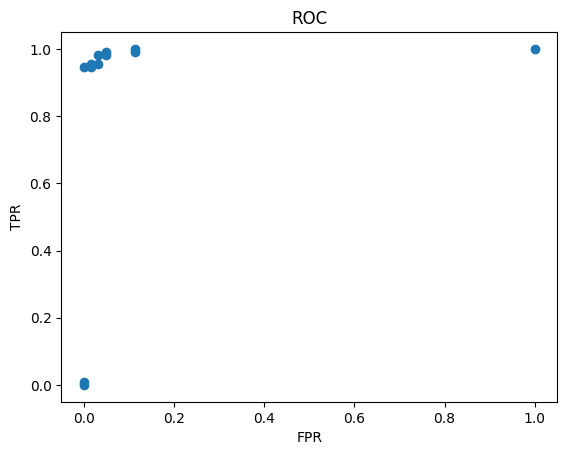

In [19]:
#Presenting the results in a scatter plot
#Remember: ROC = (fpr by tpr)
import matplotlib.pyplot as plt
plt.scatter(fpr, tpr)

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.title('ROC')

plt.show

In [22]:
#Calculating the AUC
from sklearn.metrics import roc_auc_score

print(roc_auc_score(label_test, probabilities))



0.997484462858834
